Market_Portfolio.xlsx contains monthly nominal (net) returns (expressed as percentages) for the market portfolio, over the ten-year period from Jan 2004 through Dec 2013. Assume that the (net) risk-free rate is 0.13% per month.

Market Model

Estimate the intercept coefficient (α) and slope coefficient (β) for each of the ten industry portfolio using the market model: regress the monthly excess returns for each industry portfolio on the monthly excess returns for the market portfolio.

1.) Create a table showing the intercept and slope coefficients for the ten industry portfolios.

2.) Briefly explain (in words, without mathematical equations or formulas) the economic significance and pricing implications of the intercept and slope coefficients.

Security Market Line (SML)

3.) Calculate the mean monthly return for each of the ten industry portfolios, as well as the market portfolio.

Regress the mean monthly returns of the ten industry portfolios and the market portfolio on the corresponding β's. This will give you the intercept and slope coefficients for the SML. (Note that the results may be very different from what you would expect!)

4.) Use the estimated intercept and slope coefficients for the SML to plot the SML in the range of β from zero to two on the horizontal axis.

Also plot the positions of the ten industry portfolios and the market portfolio. (You are NOT required to label the individual portfolios.)

5.) Briefly explain the economic significance and pricing implications of the SML.

In [1]:
import matplotlib.pyplot as plt
from matplotlib.pyplot import subplot, scatter, plot, axis
import numpy as np
import pandas as pd
import seaborn as sns
from scipy import stats
import statsmodels.api as sm

# Datetime
import datetime as dt
from datetime import datetime
from datetime import timedelta

import warnings
warnings.filterwarnings("ignore")

In [2]:
# Set risk free rate

rf=0.13

In [3]:
Industry_Portfolio=pd.read_excel("Industry_Portfolios.xlsx",index_col=0)
Industry_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Date,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86
...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87


In [4]:
Market_Portfolio=pd.read_excel("Market_Portfolio.xlsx",index_col=0)
Market_Portfolio

,Market
Date,
200401,2.22
200402,1.46
200403,-1.23
200404,-1.75
200405,1.23
...,...
201308,-2.69
201309,3.76
201310,4.17


In [5]:
Merged_Portfolio = Industry_Portfolio.merge(Market_Portfolio,how='inner',left_index=True, right_index=True)
Merged_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Date,,,,,,,,,,,
200401,0.06,-1.07,-0.62,0.44,4.53,1.41,0.45,3.09,1.92,2.88,2.22
200402,4.25,-0.07,1.95,4.69,-2.92,-0.52,6.09,0.89,2.07,2.16,1.46
200403,-0.09,-1.15,-0.27,-0.13,-2.55,-2.07,0.29,-3.96,1.13,-0.63,-1.23
200404,1.42,2.30,-0.17,2.52,-4.91,-0.48,-2.70,3.54,-3.55,-3.76,-1.75
200405,-1.89,-1.64,1.61,0.39,4.85,-2.95,0.30,-0.42,1.28,1.86,1.23
...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.00,-1.00,-1.95,-1.83,-0.12,-3.28,-4.21,-3.49,-4.43,-3.66,-2.69
201309,1.94,6.46,5.20,2.03,3.77,4.33,4.46,4.19,1.05,3.83,3.76
201310,4.75,0.72,4.56,4.86,3.80,5.52,5.08,3.47,3.35,3.87,4.17


In [6]:
# Calculate excess returns by deducting risk-free rate

Excess_Return_Portfolio = Merged_Portfolio-rf
Excess_Return_Portfolio

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other,Market
Date,,,,,,,,,,,
200401,-0.07,-1.20,-0.75,0.31,4.40,1.28,0.32,2.96,1.79,2.75,2.09
200402,4.12,-0.20,1.82,4.56,-3.05,-0.65,5.96,0.76,1.94,2.03,1.33
200403,-0.22,-1.28,-0.40,-0.26,-2.68,-2.20,0.16,-4.09,1.00,-0.76,-1.36
200404,1.29,2.17,-0.30,2.39,-5.04,-0.61,-2.83,3.41,-3.68,-3.89,-1.88
200405,-2.02,-1.77,1.48,0.26,4.72,-3.08,0.17,-0.55,1.15,1.73,1.10
...,...,...,...,...,...,...,...,...,...,...,...
201308,-4.13,-1.13,-2.08,-1.96,-0.25,-3.41,-4.34,-3.62,-4.56,-3.79,-2.82
201309,1.81,6.33,5.07,1.90,3.64,4.20,4.33,4.06,0.92,3.70,3.63
201310,4.62,0.59,4.43,4.73,3.67,5.39,4.95,3.34,3.22,3.74,4.04


In [7]:
# For regression

# Initialize the Market_model DataFrame with appropriate indices and columns
Market_model=pd.DataFrame(index=["Intercept","Slope"],columns=Industry_Portfolio.columns)

# Loop through each column of Excess_Return_Portfolio (except the last one, which is the market portfolio)
for column in range(Market_model.shape[1]):
    y = Excess_Return_Portfolio.iloc[:,column]                       # Dependent variable (industry portfolio)
    x = Excess_Return_Portfolio.iloc[:,-1]                           # Independent variable (market portfolio, assumed to be the last column)
    
    # Perform linear regression between the column and the market portfolio
    slope, intercept, r, p, std_err = stats.linregress(x, y)

    # Store the intercept and slope in the Market_model DataFrame
    Market_model.iloc[0,column]=intercept
    Market_model.iloc[1,column]=slope

Market_model

,NoDur,Durbl,Manuf,Enrgy,HiTec,Telcm,Shops,Hlth,Utils,Other
Intercept,0.369443,-0.415599,0.159771,0.501719,-0.06402,0.194691,0.275492,0.237841,0.444585,-0.387135
Slope,0.652647,1.648536,1.169846,0.96985,1.132969,0.900729,0.826492,0.673036,0.538086,1.207309


In [8]:
Market_model.T

,Intercept,Slope
NoDur,0.369443,0.652647
Durbl,-0.415599,1.648536
Manuf,0.159771,1.169846
Enrgy,0.501719,0.96985
HiTec,-0.06402,1.132969
Telcm,0.194691,0.900729
Shops,0.275492,0.826492
Hlth,0.237841,0.673036
Utils,0.444585,0.538086
Other,-0.387135,1.207309


### Economic significance and pricing implications of the intercept and slope coefficients

Intercept coefficient from market model regression shows pricing error based on CAPM: α > 0 (or α < 0) ⇒ asset has outperformed (or underperformed) market portfolio on risk-adjusted basis 

Slope coefficient from market model regression shows level of exposure to market risk: β > 1 (or β < 1) ⇒ more (or less) exposure to market risk than market portfolio

The intercept, also called the "alpha" or the pricing error, represents the deviation of the asset's actual returns from those predicted by CAPM for individual assets or 'passive' portfolios. If CAPM is correct, the intercept coefficient should be zero. A positive intercept indicates that the CAPM predicted returns is below the actual returns of the asset and thus the asset is underpriced according to the CAPM model. In such cases, the asset would plot above the Security Market Line (SML), indicating it has delivered excess returns not explained by market risk alone.  It is posible that there are other systematic factors impacting the asset returns that are not captured by the CAPM (not reflected in market beta) such as size, value and momentum.

The slope coefficients provide an estimate of the portfolio's beta, the amount of exposure to systematic market risk the portfolio has that cannot be diversified away by holding more risky assets in the portfolio.  If beta is higher than 1, the portfolio holds more exposure to market risk than market portfolio. If beta is less than 1, the portfolio holds less exposure to market risk than market portfolio. The higher the beta, the more exposed the industry portfolio is to market risk. Accordingly, an investor would expect to earn a higher market risk premium as economic compensation for taking on this market risk. If an asset has negative beta, it has negative correlation with market return and investors would be willing to pay a premium to own such assets to provide insurance against a market downturn.

In [9]:
# This is the original monthly return (NOT EXCESS RETURN)

Mean_monthly_return = Merged_Portfolio.mean(axis=0)
Mean_monthly_return

NoDur     0.902833
Durbl     0.733333
Manuf     1.012833
Enrgy     1.231167
HiTec     0.766250
Telcm     0.881417
Shops     0.916333
Hlth      0.783833
Utils     0.907167
Other     0.489083
Market    0.748083
dtype: float64

In [10]:
Security_Market_Line = pd.DataFrame(data=Mean_monthly_return)
Security_Market_Line.rename(mapper={0:"Mean_monthly_return"},axis=1,inplace=True) 
Security_Market_Line = Security_Market_Line.merge(Market_model.T,how="outer",left_index=True,right_index=True)
Security_Market_Line

,Mean_monthly_return,Intercept,Slope
Durbl,0.733333,-0.415599,1.648536
Enrgy,1.231167,0.501719,0.96985
HiTec,0.766250,-0.06402,1.132969
Hlth,0.783833,0.237841,0.673036
Manuf,1.012833,0.159771,1.169846
Market,0.748083,NaN,NaN
NoDur,0.902833,0.369443,0.652647
Other,0.489083,-0.387135,1.207309
Shops,0.916333,0.275492,0.826492
Telcm,0.881417,0.194691,0.900729


In [11]:
# Fill in the intercept and slope for market portfolio

Security_Market_Line.loc["Market","Intercept"]=0
Security_Market_Line.loc["Market","Slope"]=1

In [12]:
# Make sure the columns are numbers

Security_Market_Line['Intercept'] = pd.to_numeric(Security_Market_Line['Intercept'])
Security_Market_Line['Slope'] = pd.to_numeric(Security_Market_Line['Slope'])

In [13]:
# Remember that the Intercept is Alpha and the Slope is Beta
# The Mean_monthly_return is the original monthly return (NOT EXCESS RETURN)

Security_Market_Line

,Mean_monthly_return,Intercept,Slope
Durbl,0.733333,-0.415599,1.648536
Enrgy,1.231167,0.501719,0.969850
HiTec,0.766250,-0.064020,1.132969
Hlth,0.783833,0.237841,0.673036
Manuf,1.012833,0.159771,1.169846
Market,0.748083,0.000000,1.000000
NoDur,0.902833,0.369443,0.652647
Other,0.489083,-0.387135,1.207309
Shops,0.916333,0.275492,0.826492
Telcm,0.881417,0.194691,0.900729


In [14]:
# Doing a regression using Beta on mean_monthly_returns

slope, intercept, r, p, std_err = stats.linregress(Security_Market_Line["Slope"], Security_Market_Line["Mean_monthly_return"])

According to CAPM, intercept should be close to rf rate, slope should be close to market excess return

In [15]:
slope

-0.18546745836573267

In [16]:
intercept

1.0327683682657056

In [17]:
# Draw the SML

SML = intercept + slope * np.linspace(0, 2.1, 100)
SML 

array([1.03276837, 1.02883421, 1.02490005, 1.02096589, 1.01703174,
       1.01309758, 1.00916342, 1.00522926, 1.0012951 , 0.99736094,
       0.99342679, 0.98949263, 0.98555847, 0.98162431, 0.97769015,
       0.973756  , 0.96982184, 0.96588768, 0.96195352, 0.95801936,
       0.9540852 , 0.95015105, 0.94621689, 0.94228273, 0.93834857,
       0.93441441, 0.93048025, 0.9265461 , 0.92261194, 0.91867778,
       0.91474362, 0.91080946, 0.90687531, 0.90294115, 0.89900699,
       0.89507283, 0.89113867, 0.88720451, 0.88327036, 0.8793362 ,
       0.87540204, 0.87146788, 0.86753372, 0.86359957, 0.85966541,
       0.85573125, 0.85179709, 0.84786293, 0.84392877, 0.83999462,
       0.83606046, 0.8321263 , 0.82819214, 0.82425798, 0.82032383,
       0.81638967, 0.81245551, 0.80852135, 0.80458719, 0.80065303,
       0.79671888, 0.79278472, 0.78885056, 0.7849164 , 0.78098224,
       0.77704808, 0.77311393, 0.76917977, 0.76524561, 0.76131145,
       0.75737729, 0.75344314, 0.74950898, 0.74557482, 0.74164

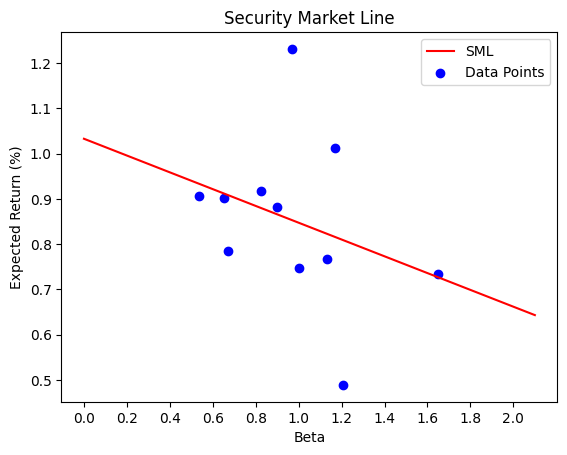

In [18]:
# Create the figure and axis objects
fig, ax = plt.subplots(1, 1)

# Plot the SML line using the generated beta_values
ax.plot(np.linspace(0, 2.1, 100), SML, label="SML", color="red")

# Scatter plot of the actual data points
ax.scatter(Security_Market_Line["Slope"], Security_Market_Line["Mean_monthly_return"], color='blue', label="Data Points")

# Set x-ticks in increments of 0.2
plt.xticks(np.arange(0, 2.1, 0.2))

# Optional: Set y-ticks if needed 
# plt.yticks(np.arange(0, 2.1, 0.1))

# Label the axes
plt.xlabel('Beta')
plt.ylabel('Expected Return (%)')

# Add title and legend
plt.title('Security Market Line')
plt.legend()

# Display the plot
plt.show()

### Economic significance and pricing implications of the SML

The Security Market Line (SML) is a graphical representation of the Capital Asset Pricing Model (CAPM). It depicts the linear relationship between an asset’s expected return and its beta.  According to CAPM, the intercept of the SML should be the risk-free rate, as an asset with zero beta has zero exposure to systematic risk, and thus should only earn the risk-free rate of return. The slope of the SML should be the excess market return. According to the CAPM, assets with a higher beta are more exposed to market risk, and investors would demand a higher expected return to compensate for taking on that additional risk.

All assets that lie on the SML have the same Treynor ratio, meaning they offer the same ratio of risk premium to systematic risk (beta). In equilibrium, such assets are fairly priced, providing a return that is consistent with their level of market risk.

Assets that lie above the SML are considered underpriced. This is because their actual or expected return is higher than the return predicted by the CAPM for their given level of risk (beta). As investors recognize the asset's underpricing, they will buy the asset, driving its price up and lowering its expected return until it aligns with the SML.

Conversely, assets that lie below the SML are viewed as overpriced since their expected return is lower than the CAPM prediction for their risk level. Investors will likely sell these assets, causing their prices to fall, and their expected returns to rise, until they eventually align with the SML.